In [ ]:
# Thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đọc dữ liệu từ một tệp CSV
data = pd.read_csv('/content/sample_data/medical_students_dataset.csv')

In [ ]:
# hiển thị thông tin cơ bản về dữ liệu trong DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
# trả về thông tin chứa số lượng dòng và cột của DataFrame
data.shape

(200000, 13)

In [ ]:
# hiển thị một số dòng đầu tiên của DataFrame
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
# tạo một bản sao độc lập của DataFrame
df = data.copy()

In [ ]:
# loại bỏ khoảng trắng
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = data[i].str.strip()

In [ ]:
# xóa dữ liệu bị trùng lặp
df.drop_duplicates(inplace=True)

In [ ]:
# đếm số lượng giá trị duy nhất trong mỗi cột của DataFrame
df.nunique()

Student ID        98976
Age                  17
Gender                2
Height            98992
Weight            99026
Blood Type            4
BMI               98983
Temperature       99006
Heart Rate           40
Blood Pressure       50
Cholesterol         130
Diabetes              2
Smoking               2
dtype: int64

In [ ]:
# đếm số lượng giá trị thiếu trong mỗi cột của DataFrame
df.isnull().sum()

Student ID        19891
Age               19892
Gender            19924
Height            19907
Weight            19901
Blood Type        19916
BMI               19900
Temperature       19911
Heart Rate        19903
Blood Pressure    19892
Cholesterol       19893
Diabetes          19905
Smoking           19897
dtype: int64

In [ ]:
#xóa các dòng không có dữ liệu
df.dropna(axis='index',how='any',inplace=True)

In [ ]:
#xóa cột thuộc tính
df = df.drop(['Student ID'], axis = 1)


In [ ]:
#Hiển thị thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44337 entries, 2 to 199998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             44337 non-null  float64
 1   Gender          44337 non-null  object 
 2   Height          44337 non-null  float64
 3   Weight          44337 non-null  float64
 4   Blood Type      44337 non-null  object 
 5   BMI             44337 non-null  float64
 6   Temperature     44337 non-null  float64
 7   Heart Rate      44337 non-null  float64
 8   Blood Pressure  44337 non-null  float64
 9   Cholesterol     44337 non-null  float64
 10  Diabetes        44337 non-null  object 
 11  Smoking         44337 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.4+ MB


In [ ]:
# Đếm số lượng giá trị thiếu
df.isnull().sum()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [ ]:
# thay thế các giá trị NaN bằng giá trị trung bình của cột
df['Age'] = df['Age'].replace(np.NaN, df['Age'].mean())
df['Height'] = df['Height'].replace(np.NaN, df['Height'].mean())
df['Weight'] = df['Weight'].replace(np.NaN, df['Weight'].mean())
df['Temperature'] = df['Temperature'].replace(np.NaN, df['Temperature'].mean())
df['Heart Rate'] = df['Heart Rate'].replace(np.NaN, df['Heart Rate'].mean())
df['Blood Pressure'] = df['Blood Pressure'].replace(np.NaN, df['Blood Pressure'].mean())
df['Cholesterol'] = df['Cholesterol'].replace(np.NaN, df['Cholesterol'].mean())

In [ ]:
#điền các giá trị bị thiếu vào ô gender
df['Gender'] = df['Gender'].fillna('Other')

In [ ]:
# # điền giá trị 0 vào các ô trống (NaN)
# df['Diabetes'].fillna(0, inplace=True)
# df['Smoking'].fillna(0, inplace=True)
# df['Blood Type'].fillna(0, inplace=True)

In [ ]:
# Đếm số lượng của
df.Diabetes.value_counts()

No     39960
Yes     4377
Name: Diabetes, dtype: int64

In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Gender'] = df['Gender'].replace('Male',0)
df['Gender'] = df['Gender'].replace('Female',1)
df['Gender'] = df['Gender'].replace('Other',2)

df['Diabetes'] = df['Diabetes'].replace('No',0)
df['Diabetes'] = df['Diabetes'].replace('Yes',1)

df['Smoking'] = df['Smoking'].replace('No',0)
df['Smoking'] = df['Smoking'].replace('Yes',1)

df['Blood Type'] = df['Blood Type'].replace('AB',0)
df['Blood Type'] = df['Blood Type'].replace('O',1)
df['Blood Type'] = df['Blood Type'].replace('A',2)
df['Blood Type'] = df['Blood Type'].replace('B',3)

df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,32.0,1,182.537664,55.741083,2,16.729017,98.260293,76.0,130.0,216.0,1,0
7,28.0,0,186.489402,52.389752,0,15.063921,98.227788,85.0,123.0,128.0,0,0
11,34.0,1,182.416302,76.371050,0,22.950992,98.118274,86.0,97.0,247.0,0,0
19,31.0,0,166.489929,49.955569,3,18.022207,98.809750,82.0,96.0,223.0,0,0
22,29.0,1,179.909041,90.679436,0,28.015787,98.782269,81.0,108.0,227.0,0,1


In [ ]:
#chuyển float sang dạng int
df['Age'] = df['Age'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)
df['Blood Type'] = df['Blood Type'].astype(int)
df['BMI'] = df['BMI'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['Heart Rate'] = df['Heart Rate'].astype(int)
df['Blood Pressure'] = df['Blood Pressure'].astype(int)
df['Cholesterol'] = df['Cholesterol'].astype(int)
df['Diabetes'] = df['Diabetes'].astype(int)
df['Smoking'] = df['Smoking'].astype(int)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,32,1,182,55,2,16,98,76,130,216,1,0
7,28,0,186,52,0,15,98,85,123,128,0,0
11,34,1,182,76,0,22,98,86,97,247,0,0
19,31,0,166,49,3,18,98,82,96,223,0,0
22,29,1,179,90,0,28,98,81,108,227,0,1


In [ ]:
# Thống kê mô tả dữ liệu
df.describe(include='all')

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
count,44337.000000,44337.000000,44337.000000,44337.000000,44337.000000,44337.00000,44337.000000,44337.000000,44337.000000,44337.000000,44337.000000,44337.000000
mean,26.032433,0.501252,174.430228,69.536392,1.510612,22.87171,98.099939,79.534610,114.540474,184.314726,0.098721,0.199968
std,4.881424,0.500004,14.442414,17.317637,1.117280,7.06962,0.571924,11.527188,14.376523,37.672076,0.298291,0.399981
min,18.000000,0.000000,150.000000,40.000000,0.000000,10.00000,96.000000,60.000000,90.000000,120.000000,0.000000,0.000000
25%,22.000000,0.000000,162.000000,54.000000,1.000000,17.00000,98.000000,70.000000,102.000000,152.000000,0.000000,0.000000
50%,26.000000,1.000000,174.000000,70.000000,2.000000,22.00000,98.000000,80.000000,115.000000,184.000000,0.000000,0.000000
75%,30.000000,1.000000,187.000000,85.000000,3.000000,28.00000,98.000000,90.000000,127.000000,217.000000,0.000000,0.000000
max,34.000000,1.000000,199.000000,99.000000,3.000000,44.00000,100.000000,99.000000,139.000000,249.000000,1.000000,1.000000


<Axes: xlabel='Diabetes'>

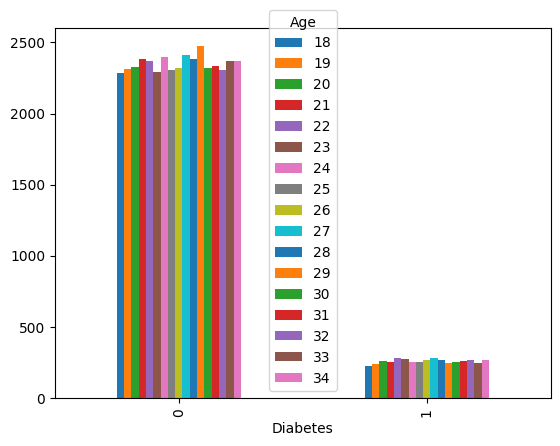

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Age'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

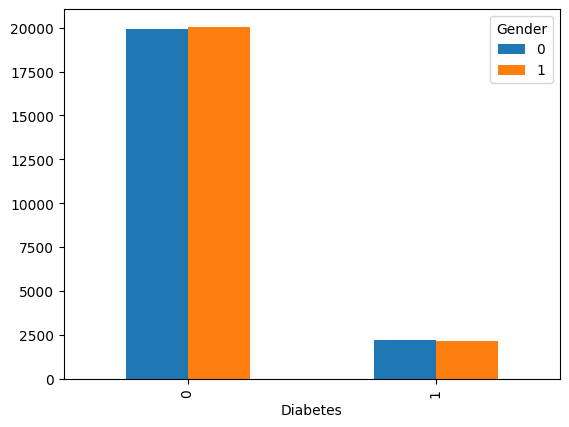

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Gender'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

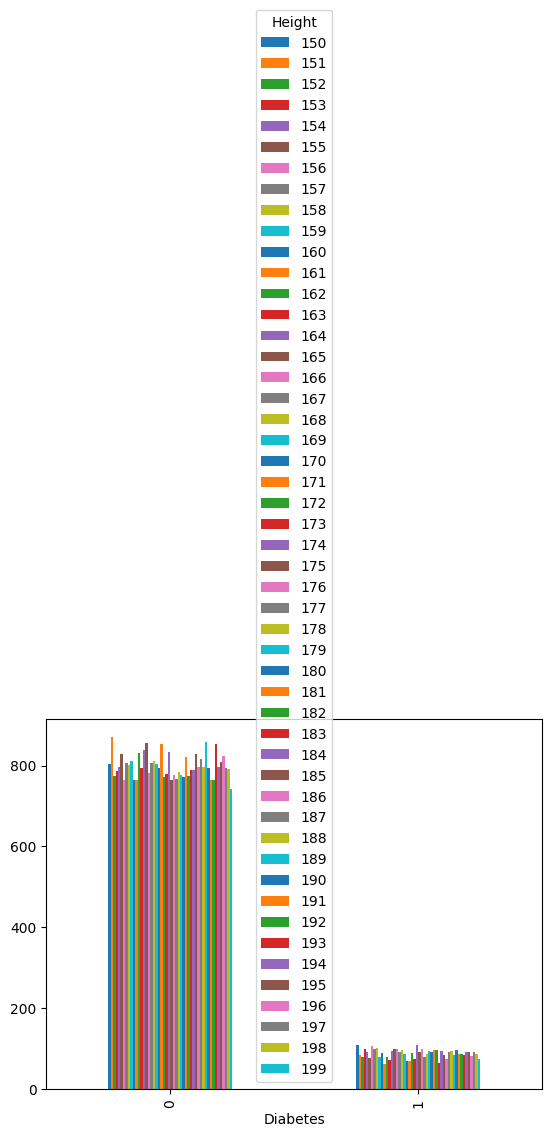

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Height'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

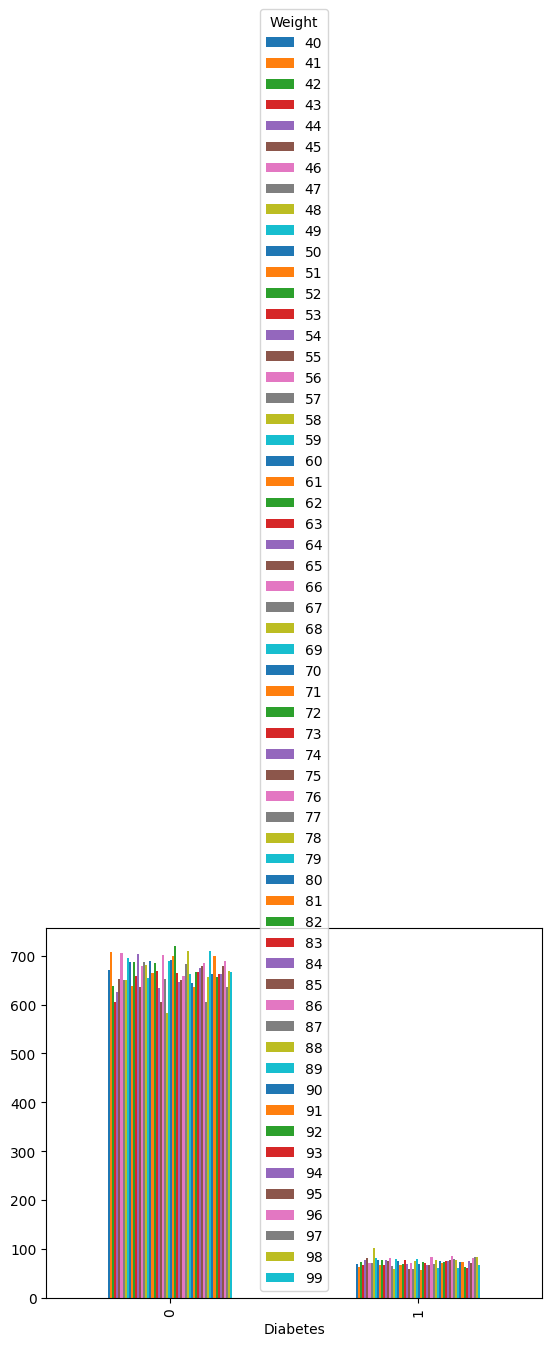

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Weight'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

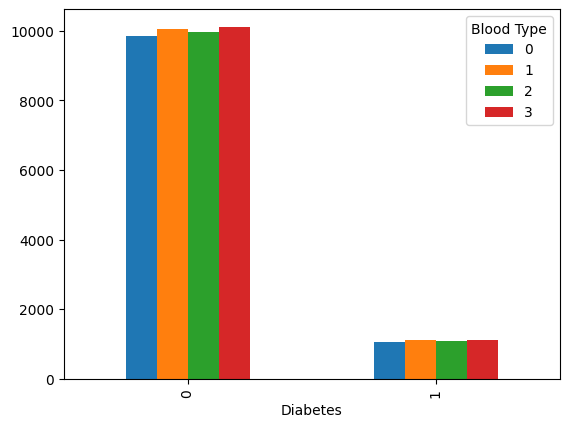

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Blood Type'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

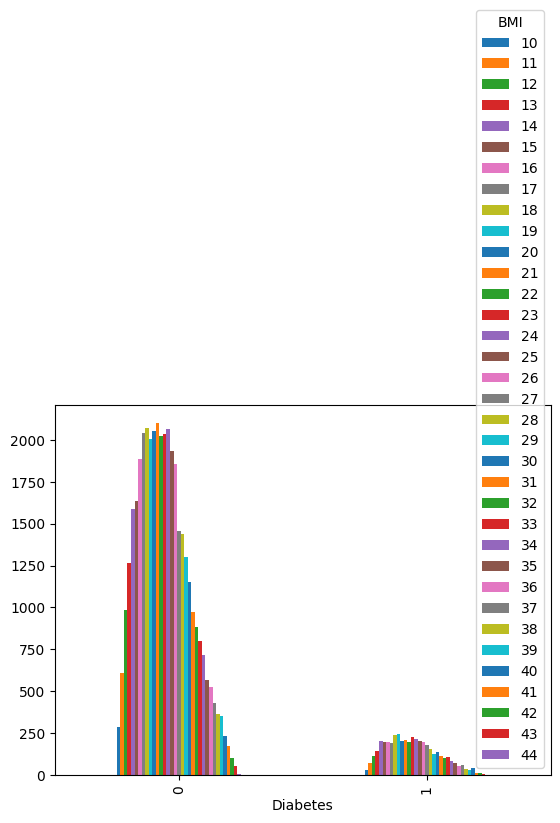

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['BMI'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

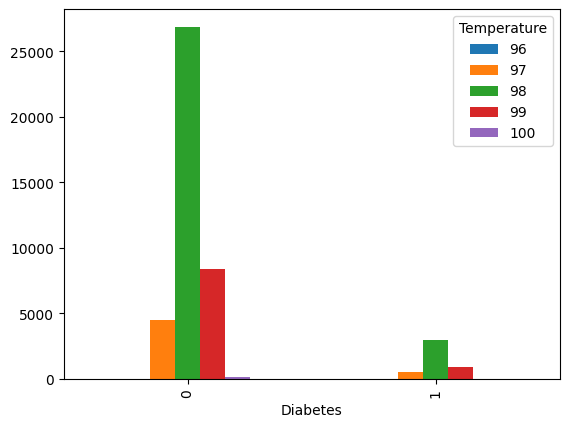

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Temperature'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

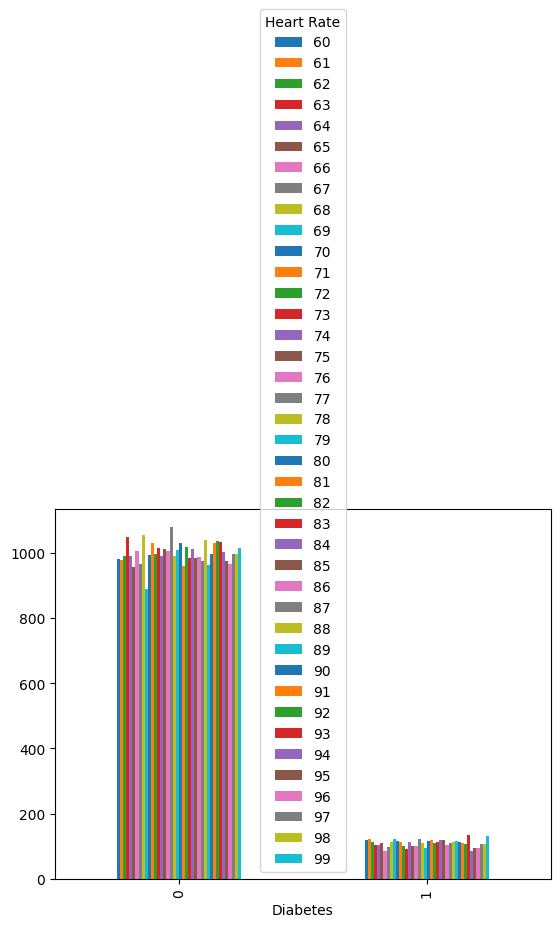

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Heart Rate'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

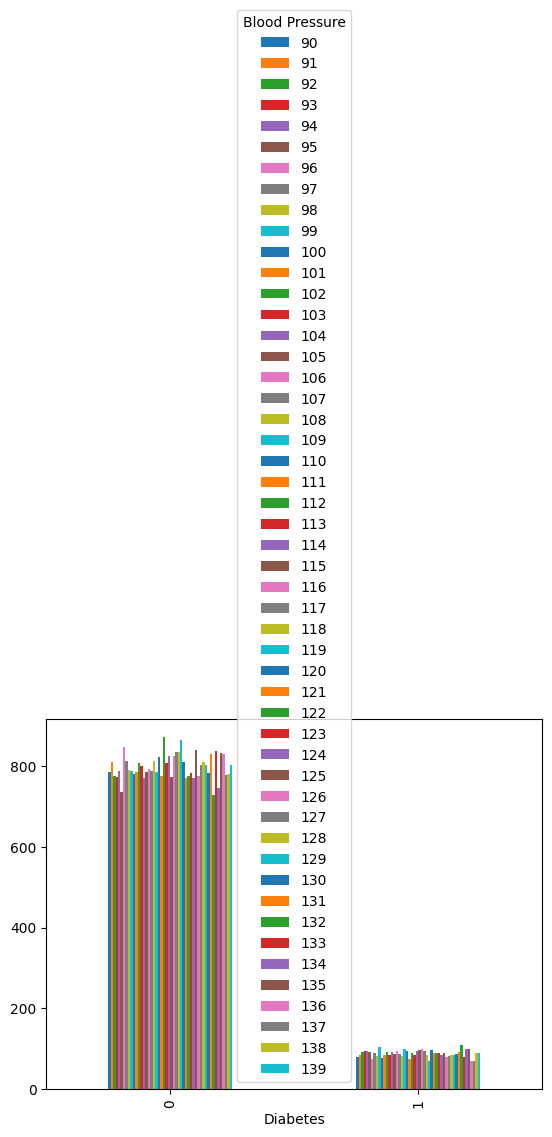

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Blood Pressure'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

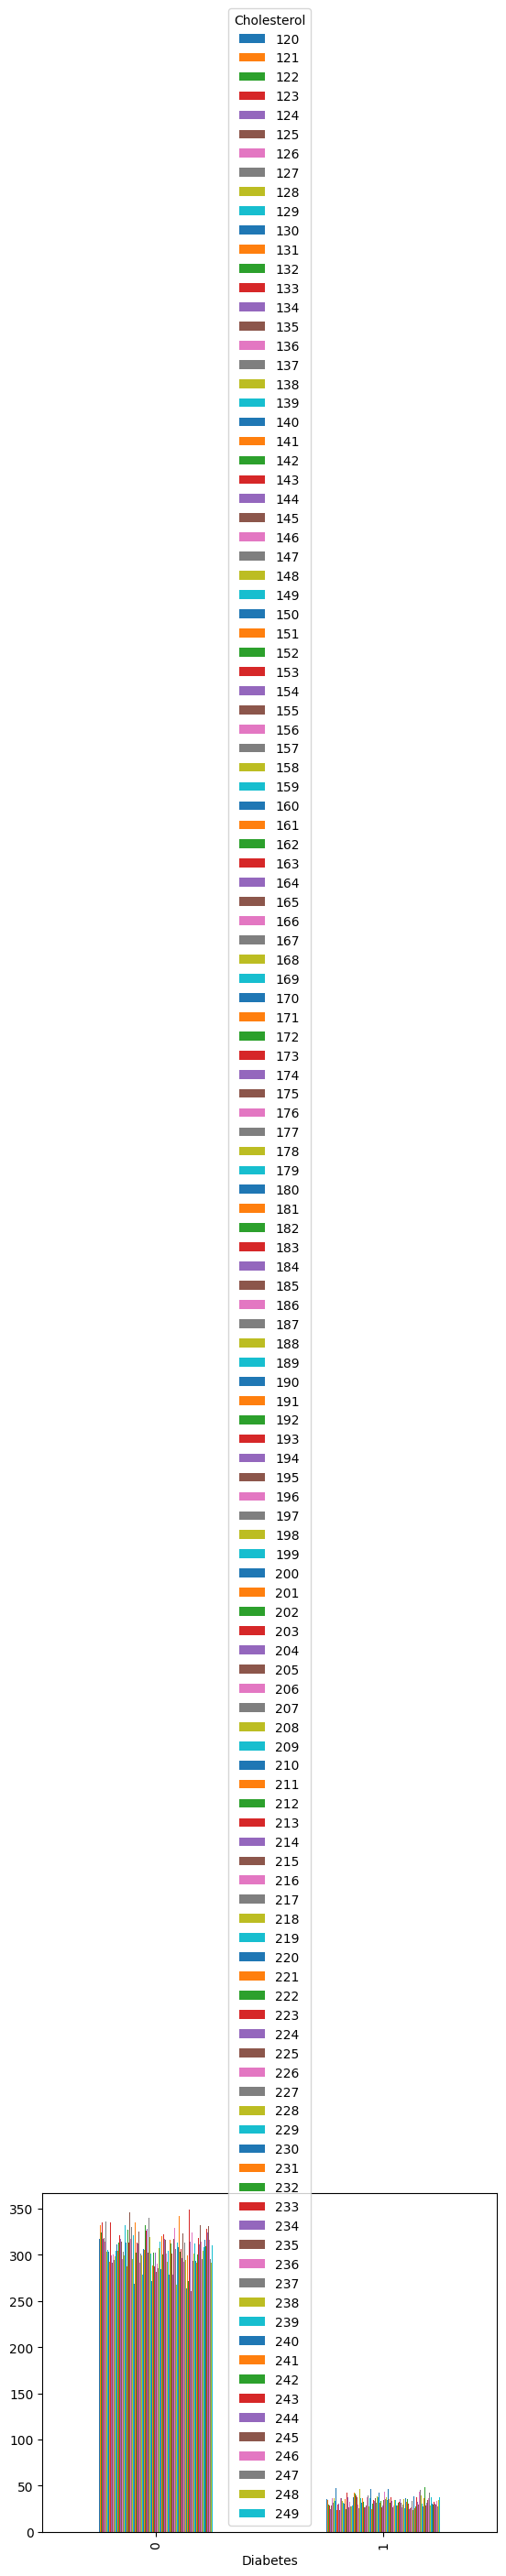

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Cholesterol'])
class_sex.plot(kind ='bar')

<Axes: xlabel='Diabetes'>

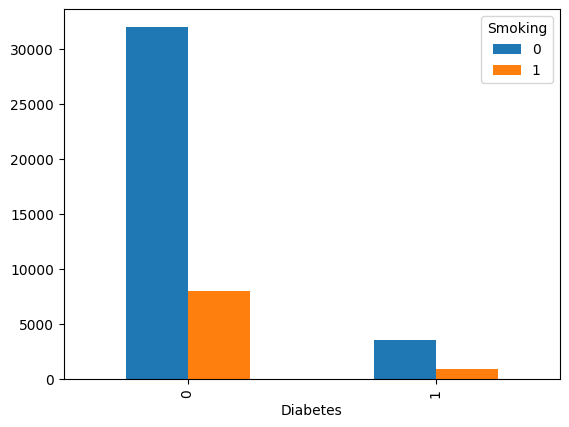

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Smoking'])
class_sex.plot(kind ='bar')

In [ ]:
bins = [18,25,34]  # Định nghĩa các khoảng tuổi
labels = ['thanh niên', 'Trung niên']  # Nhãn cho các nhóm tuổi: 18-25, 26-34

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,Trung niên,1,182,55,2,16,98,76,130,216,1,0
7,Trung niên,0,186,52,0,15,98,85,123,128,0,0
11,Trung niên,1,182,76,0,22,98,86,97,247,0,0
19,Trung niên,0,166,49,3,18,98,82,96,223,0,0
22,Trung niên,1,179,90,0,28,98,81,108,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Age'] = df['Age'].replace('thanh niên',0)
df['Age'] = df['Age'].replace('Trung niên',1)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,182,55,2,16,98,76,130,216,1,0
7,1,0,186,52,0,15,98,85,123,128,0,0
11,1,1,182,76,0,22,98,86,97,247,0,0
19,1,0,166,49,3,18,98,82,96,223,0,0
22,1,1,179,90,0,28,98,81,108,227,0,1


<Axes: xlabel='Diabetes'>

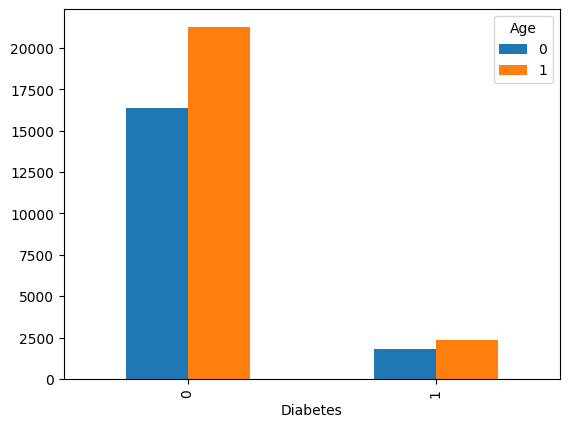

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Age'])
class_sex.plot(kind ='bar')

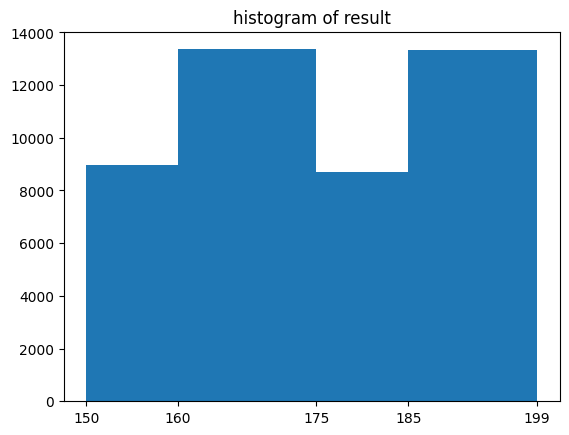

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['Height']
ax.hist(a, bins = [150,160,175,185,199])
ax.set_title("histogram of result")
ax.set_xticks([150,160,175,185,199])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [150,160,175,185,199]  # định dạng nhóm chiều cao
labels = ['<160','160-175','175-185','>185']

df['Height'] = pd.cut(df['Height'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,175-185,55,2,16,98,76,130,216,1,0
7,1,0,>185,52,0,15,98,85,123,128,0,0
11,1,1,175-185,76,0,22,98,86,97,247,0,0
19,1,0,160-175,49,3,18,98,82,96,223,0,0
22,1,1,175-185,90,0,28,98,81,108,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Height'] = df['Height'].replace('<160',0)
df['Height'] = df['Height'].replace('160-175',1)
df['Height'] = df['Height'].replace('175-185',2)
df['Height'] = df['Height'].replace('>185',3)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,55,2,16,98,76,130,216,1,0
7,1,0,3,52,0,15,98,85,123,128,0,0
11,1,1,2,76,0,22,98,86,97,247,0,0
19,1,0,1,49,3,18,98,82,96,223,0,0
22,1,1,2,90,0,28,98,81,108,227,0,1


<Axes: xlabel='Diabetes'>

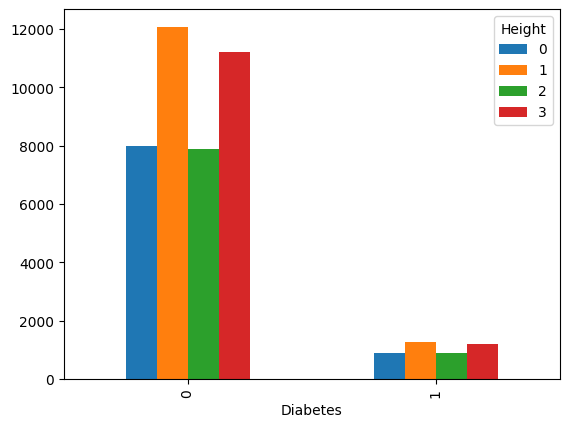

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Height'])
class_sex.plot(kind ='bar')

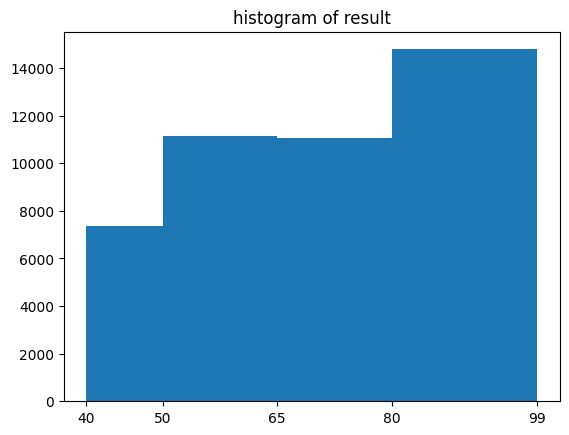

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['Weight']
ax.hist(a, bins = [40,50,65,80,99])
ax.set_title("histogram of result")
ax.set_xticks([40,50,65,80,99])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [40,50,65,80,99]  # Định nghĩa nhóm cân nặng
labels = ['40-50','51-65','66-80','>80']

df['Weight'] = pd.cut(df['Weight'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,51-65,2,16,98,76,130,216,1,0
7,1,0,3,51-65,0,15,98,85,123,128,0,0
11,1,1,2,66-80,0,22,98,86,97,247,0,0
19,1,0,1,40-50,3,18,98,82,96,223,0,0
22,1,1,2,>80,0,28,98,81,108,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Weight'] = df['Weight'].replace('40-50',0)
df['Weight'] = df['Weight'].replace('51-65',1)
df['Weight'] = df['Weight'].replace('66-80',2)
df['Weight'] = df['Weight'].replace('>80',3)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,16,98,76,130,216,1,0
7,1,0,3,1,0,15,98,85,123,128,0,0
11,1,1,2,2,0,22,98,86,97,247,0,0
19,1,0,1,0,3,18,98,82,96,223,0,0
22,1,1,2,3,0,28,98,81,108,227,0,1


<Axes: xlabel='Diabetes'>

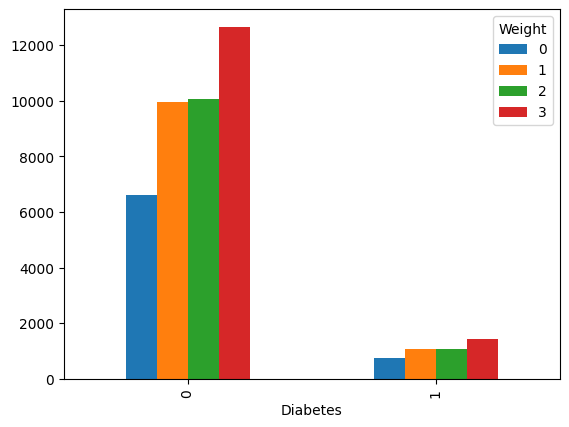

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Weight'])
class_sex.plot(kind ='bar')

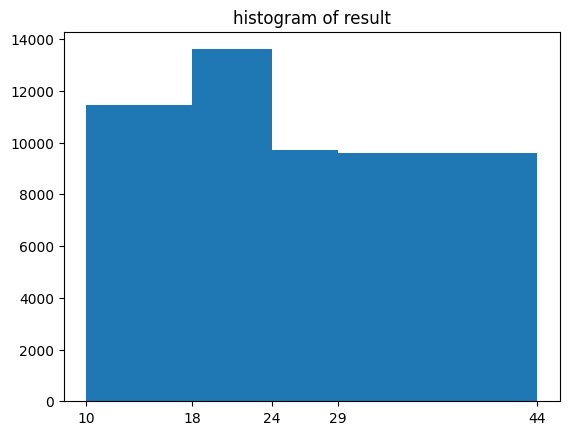

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['BMI']
ax.hist(a, bins = [10,18,24,29,44])
ax.set_title("histogram of result")
ax.set_xticks([10,18,24,29,44])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [10,18,24,29,44]  # Định nghĩa nhóm chỉ số thể trọng
labels = ['Thiếu cân', 'Bình thường','Thừa cân','Béo phì'] # <18, 18-24, 25-29,>29

df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,Thiếu cân,98,76,130,216,1,0
7,1,0,3,1,0,Thiếu cân,98,85,123,128,0,0
11,1,1,2,2,0,Bình thường,98,86,97,247,0,0
19,1,0,1,0,3,Thiếu cân,98,82,96,223,0,0
22,1,1,2,3,0,Thừa cân,98,81,108,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['BMI'] = df['BMI'].replace('Thiếu cân',0)
df['BMI'] = df['BMI'].replace('Bình thường',1)
df['BMI'] = df['BMI'].replace('Thừa cân',2)
df['BMI'] = df['BMI'].replace('Béo phì',3)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,76,130,216,1,0
7,1,0,3,1,0,0,98,85,123,128,0,0
11,1,1,2,2,0,1,98,86,97,247,0,0
19,1,0,1,0,3,0,98,82,96,223,0,0
22,1,1,2,3,0,2,98,81,108,227,0,1


<Axes: xlabel='Diabetes'>

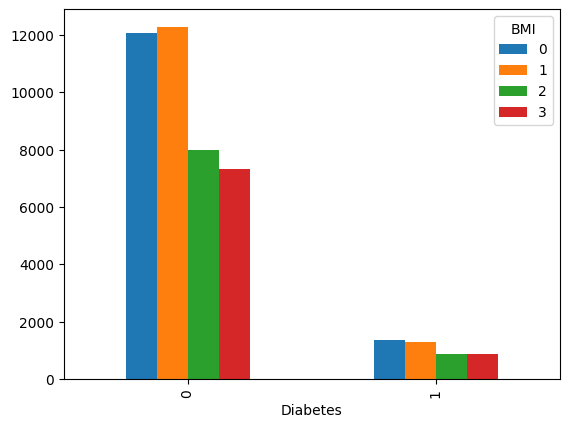

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['BMI'])
class_sex.plot(kind ='bar')

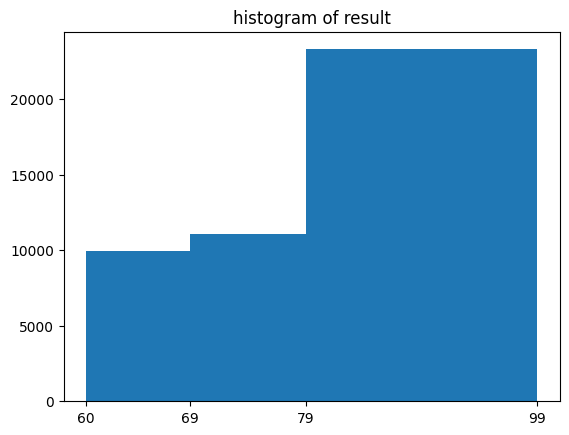

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['Heart Rate']
ax.hist(a, bins = [60,69,79,99])
ax.set_title("histogram of result")
ax.set_xticks([60,69,79,99])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [60,69,79,99]  # Định nghĩa các khoảng tuổi
labels = ['60-69', '70-79','>=80']

df['Heart Rate'] = pd.cut(df['Heart Rate'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,70-79,130,216,1,0
7,1,0,3,1,0,0,98,>=80,123,128,0,0
11,1,1,2,2,0,1,98,>=80,97,247,0,0
19,1,0,1,0,3,0,98,>=80,96,223,0,0
22,1,1,2,3,0,2,98,>=80,108,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Heart Rate'] = df['Heart Rate'].replace('60-69',0)
df['Heart Rate'] = df['Heart Rate'].replace('70-79',1)
df['Heart Rate'] = df['Heart Rate'].replace('>=80',2)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,130,216,1,0
7,1,0,3,1,0,0,98,2,123,128,0,0
11,1,1,2,2,0,1,98,2,97,247,0,0
19,1,0,1,0,3,0,98,2,96,223,0,0
22,1,1,2,3,0,2,98,2,108,227,0,1


<Axes: xlabel='Diabetes'>

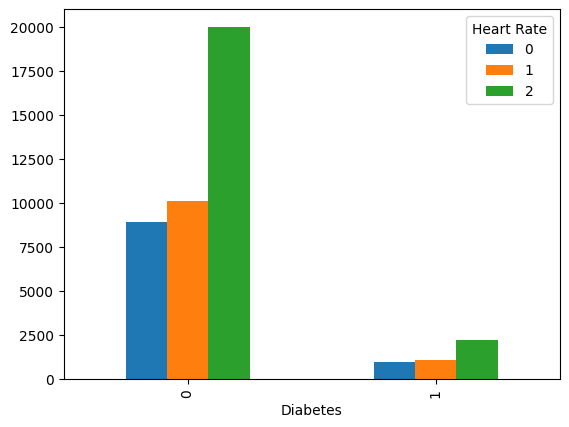

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Heart Rate'])
class_sex.plot(kind ='bar')

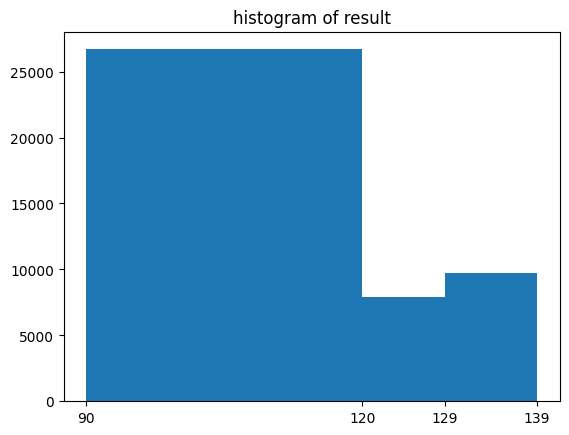

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['Blood Pressure']
ax.hist(a, bins = [90,120,129,139])
ax.set_title("histogram of result")
ax.set_xticks([90,120,129,139])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [90,120,129,139]  # Định nghĩa các khoảng tuổi
labels = ['huyết áp thấp', 'huyết áp bình thường','huyết áp cao']

df['Blood Pressure'] = pd.cut(df['Blood Pressure'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,huyết áp cao,216,1,0
7,1,0,3,1,0,0,98,2,huyết áp bình thường,128,0,0
11,1,1,2,2,0,1,98,2,huyết áp thấp,247,0,0
19,1,0,1,0,3,0,98,2,huyết áp thấp,223,0,0
22,1,1,2,3,0,2,98,2,huyết áp thấp,227,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Blood Pressure'] = df['Blood Pressure'].replace('huyết áp thấp',0)
df['Blood Pressure'] = df['Blood Pressure'].replace('huyết áp bình thường',1)
df['Blood Pressure'] = df['Blood Pressure'].replace('huyết áp cao',2)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,2,216,1,0
7,1,0,3,1,0,0,98,2,1,128,0,0
11,1,1,2,2,0,1,98,2,0,247,0,0
19,1,0,1,0,3,0,98,2,0,223,0,0
22,1,1,2,3,0,2,98,2,0,227,0,1


<Axes: xlabel='Diabetes'>

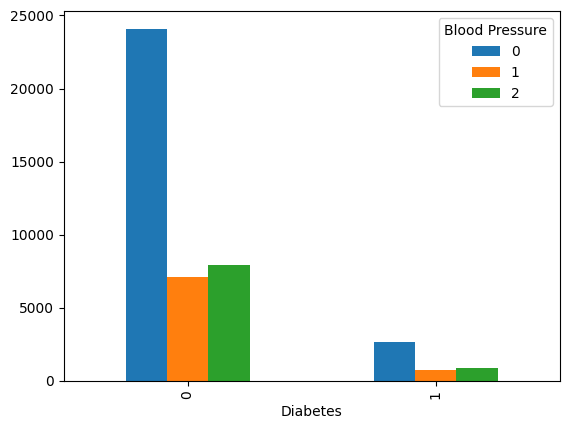

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Blood Pressure'])
class_sex.plot(kind ='bar')

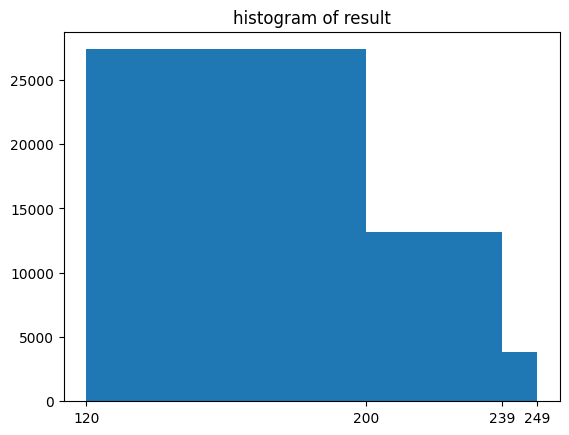

In [ ]:
fig,ax = plt.subplots(1,1)
a=df['Cholesterol']
ax.hist(a, bins = [120,200,239,249])
ax.set_title("histogram of result")
ax.set_xticks([120,200,239,249])
# Hiển thị biểu đồ
plt.show()

In [ ]:
bins = [120,200,239,249]  # Định nghĩa các Cholesterol
labels = ['Mức bình thường', 'Mức chú ý','Mức nguy cơ cao'] # <200, 200-239,>=240

df['Cholesterol'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,2,Mức chú ý,1,0
7,1,0,3,1,0,0,98,2,1,Mức bình thường,0,0
11,1,1,2,2,0,1,98,2,0,Mức nguy cơ cao,0,0
19,1,0,1,0,3,0,98,2,0,Mức chú ý,0,0
22,1,1,2,3,0,2,98,2,0,Mức chú ý,0,1


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Cholesterol'] = df['Cholesterol'].replace('Mức bình thường',0)
df['Cholesterol'] = df['Cholesterol'].replace('Mức chú ý',1)
df['Cholesterol'] = df['Cholesterol'].replace('Mức nguy cơ cao',2)
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,2,1,1,0
7,1,0,3,1,0,0,98,2,1,0,0,0
11,1,1,2,2,0,1,98,2,0,2,0,0
19,1,0,1,0,3,0,98,2,0,1,0,0
22,1,1,2,3,0,2,98,2,0,1,0,1


<Axes: xlabel='Diabetes'>

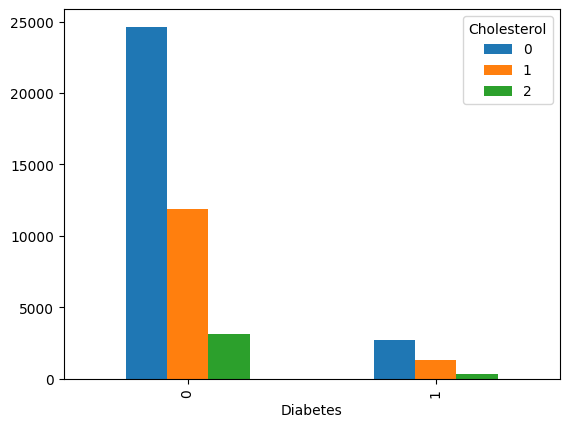

In [ ]:
class_sex = pd.crosstab(df['Diabetes'],df['Cholesterol'])
class_sex.plot(kind ='bar')

In [ ]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,1,1,2,1,2,0,98,1,2,1,1,0
7,1,0,3,1,0,0,98,2,1,0,0,0
11,1,1,2,2,0,1,98,2,0,2,0,0
19,1,0,1,0,3,0,98,2,0,1,0,0
22,1,1,2,3,0,2,98,2,0,1,0,1


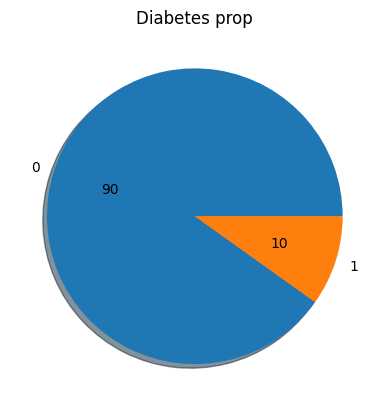

In [ ]:
plt.pie(df.Diabetes.value_counts(),
        labels = df.Diabetes.value_counts().index.astype(str),
        autopct= '%.f',shadow=True)
plt.title('Diabetes prop')
plt.show()

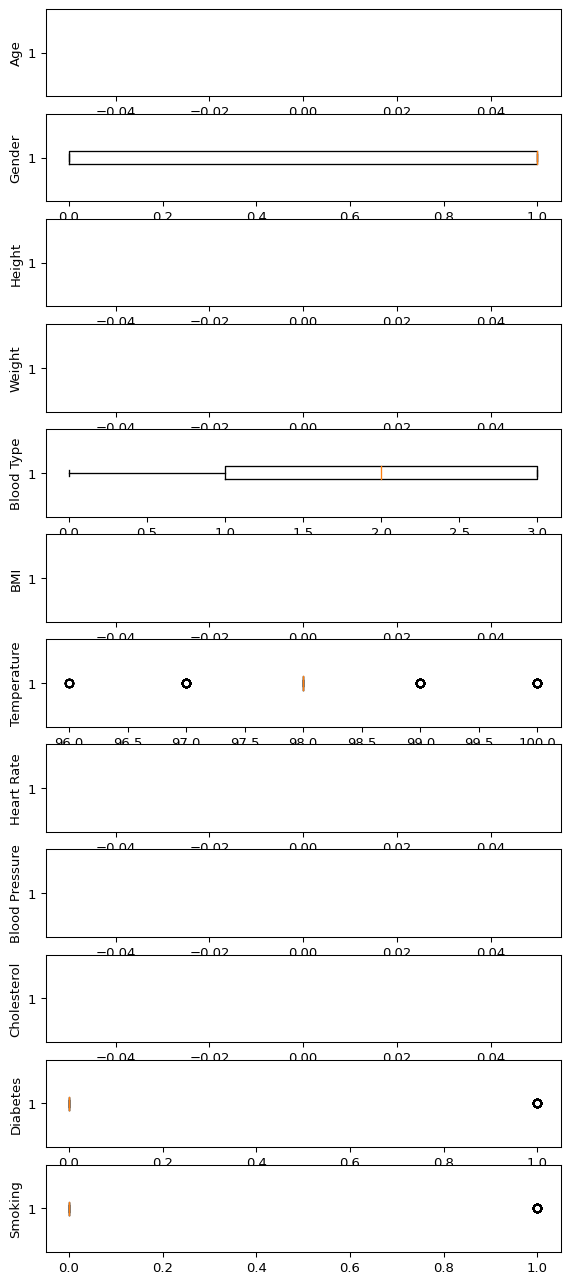

In [ ]:
fig, axs = plt.subplots(12,1,dpi = 95, figsize = (7,17))
i=0
for col in df.columns:
  axs[i].boxplot(df[col],vert=False)
  axs[i].set_ylabel(col)
  i+=1
plt.show()

<ipython-input-253-74a9dc31a7d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, fmt = '.2f')


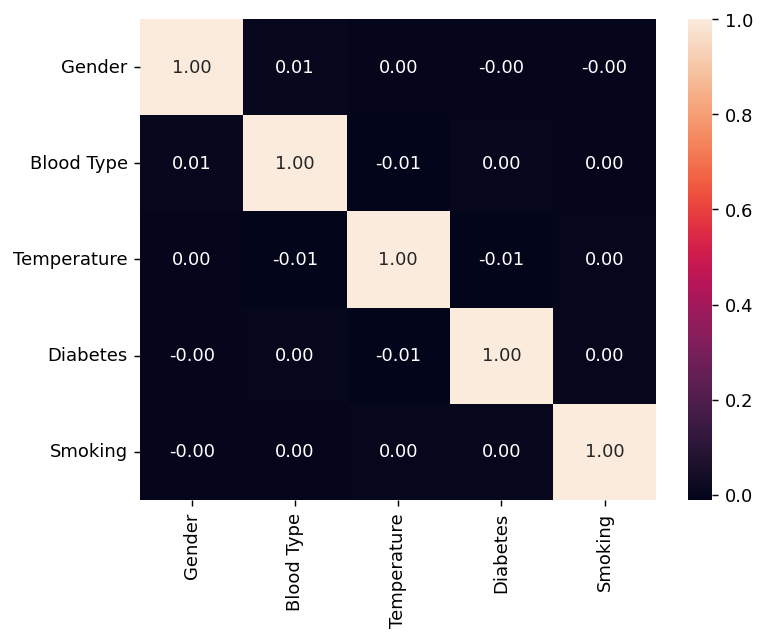

In [ ]:
plt.figure(dpi=130)
sns.heatmap(df.corr(),annot = True, fmt = '.2f')
plt.show()

In [ ]:
x = df.drop(['Diabetes'], axis=1)
y = df.Diabetes.apply(lambda x : 'Diabetes' if x == 1 else 'Not Diabetes')
Y_name = ['0','1']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
max_depth_values = range(3, 101)
best_accuracy = 0
best_max_depth = None
for max_depth in max_depth_values:
    # Xây dựng cây quyết định với độ sâu max_depth
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)

    # Dự đoán nhãn trên tập kiểm tra
    y_pred = model.predict(x_test)

    # Đánh giá hiệu suất sử dụng độ chính xác
    accuracy = accuracy_score(y_test, y_pred)

    # Lưu lại max_depth tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

print("Max depth phù hợp là:", best_max_depth)

Max depth phù hợp là: 4


In [ ]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

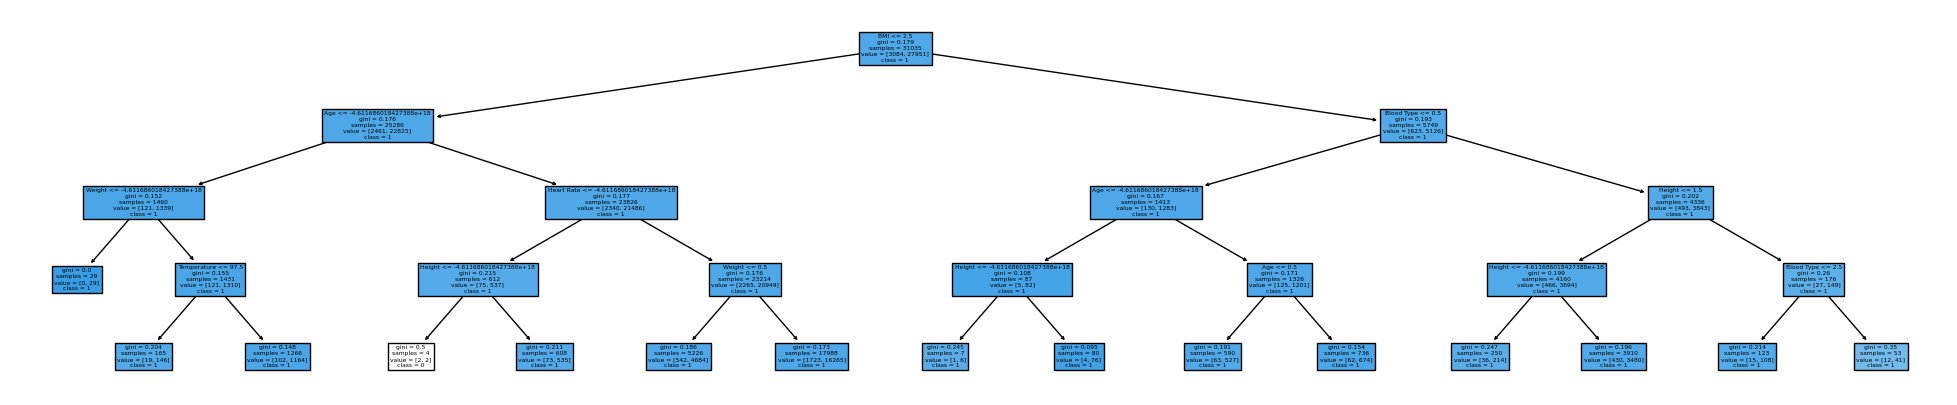

In [ ]:
fig = plt.figure(figsize=(25, 5))
show = tree.plot_tree(clf, feature_names=x.columns,
                      class_names=Y_name, filled = True)

In [ ]:
y_pred = clf.predict(x_test)
print("Accuracy for testint data", accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy for testint data 0.9025710419485792


In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred1 = gaussian.predict(x_test)
accuracy_NB = accuracy_score(y_test,Y_pred1)
print(accuracy_NB)

0.8631032927379342
